# Sitio Tinga Data Analysis
This notebook utilizes geospatial data analysis to compare site 1888 to other toxic sites found in the Philippines and the world.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import geopandas as gpd
import pandas as pd
import contextily as cx
import json
import matplotlib.colors as mcolors
from scipy.stats import norm

In [22]:
# AOI - Area of Interest
LAT = 10.29345
LON = 123.889883333

In [23]:
POLLUTANTS = ['Cadmium', 'Arsenic', 'Mercury', 'Copper', 'Lead']
x = np.arange(len(POLLUTANTS))  # Positions for each element

MRL_BASE_STANDARD_FOR_CADMIUM = .0001
MRL_BASE_STANDARD_FOR_ARSENIC = .0003
MRL_BASE_STANDARD_FOR_MERCURY = .00002
MRL_BASE_STANDARD_FOR_COPPER = .02
MRL_BASE_STANDARD_FOR_LEAD = .0005

MRL_BASE_STANDARD = [MRL_BASE_STANDARD_FOR_CADMIUM, MRL_BASE_STANDARD_FOR_ARSENIC, MRL_BASE_STANDARD_FOR_MERCURY, MRL_BASE_STANDARD_FOR_COPPER, MRL_BASE_STANDARD_FOR_LEAD]
data = [MRL_BASE_STANDARD_FOR_CADMIUM*33, MRL_BASE_STANDARD_FOR_ARSENIC*668, MRL_BASE_STANDARD_FOR_MERCURY*1.5, MRL_BASE_STANDARD_FOR_COPPER*3.7, MRL_BASE_STANDARD_FOR_LEAD*1.5]

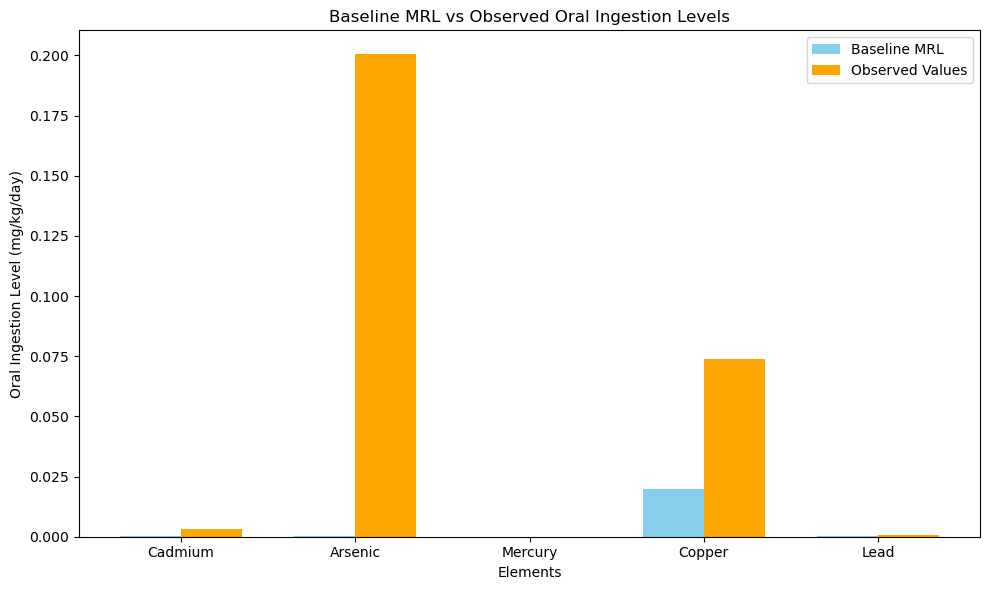

In [4]:
# Set the width of the bars
width = 0.35  # Width of the bars

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))
# Create bars for the baseline MRL and observed values
bars1 = ax.bar(x - width/2, MRL_BASE_STANDARD, width, label='Baseline MRL', color='skyblue')
bars2 = ax.bar(x + width/2, data, width, label='Observed Values', color='orange')

# Labeling the axes and the title
ax.set_xlabel('Elements')
ax.set_ylabel('Oral Ingestion Level (mg/kg/day)')
ax.set_title('Baseline MRL vs Observed Oral Ingestion Levels')
ax.set_xticks(x)
ax.set_xticklabels(POLLUTANTS)
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('plots/baseline_vs_observed.png', dpi=300)
plt.show()

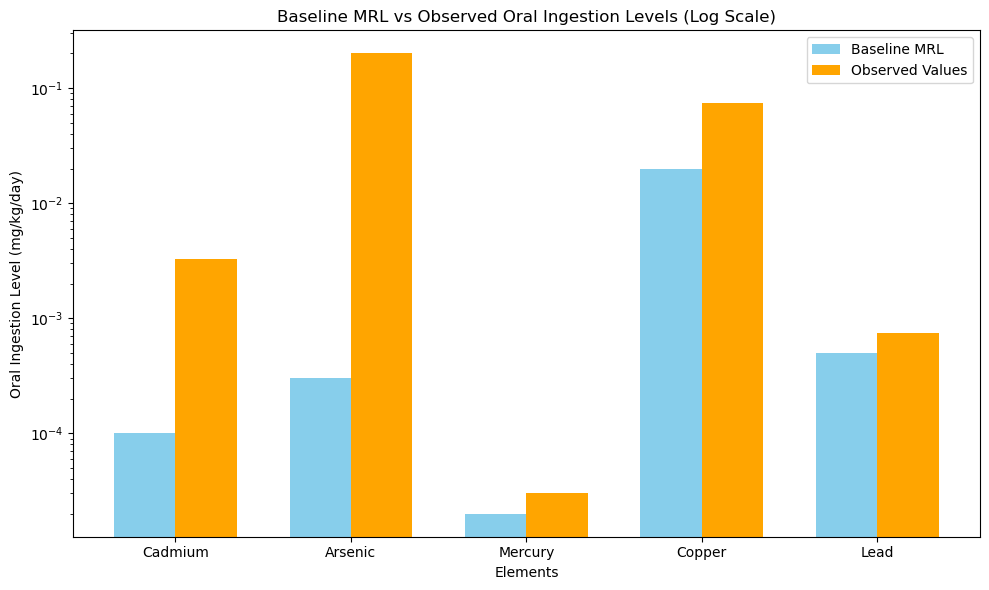

In [5]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))
# Create bars for the baseline MRL and observed values
bars1 = ax.bar(x - width/2, MRL_BASE_STANDARD, width, label='Baseline MRL', color='skyblue')
bars2 = ax.bar(x + width/2, data, width, label='Observed Values', color='orange')

# Labeling the axes and the title
ax.set_xlabel('Elements')
ax.set_ylabel('Oral Ingestion Level (mg/kg/day)')
ax.set_title('Baseline MRL vs Observed Oral Ingestion Levels (Log Scale)')
# Set the logarithmic scale for the y-axis
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(POLLUTANTS)
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('plots/baseline_vs_observed (logarithmic-scale).png', dpi=300)
plt.show()

### Visualizing The AOI

In [24]:
# samples
## LEAD
lead_sample_1 = (10.29345, 123.889883333, 543809.46) # lat lon mg
lead_sample_2 = (10.293504, 123.889911, 6504.94)
lead_sample_3 = (10.293544, 123.890178, 3266.26)

## ARSENIC
arsenic_sample_1 = (10.29345, 123.889883333, 5538.43)
arsenic_sample_2 = (10.293544, 123.890178, 167.38)
arsenic_sample_3 = (10.293504, 123.889911, 198.7)

## CADMIUM
cadmium_sample_1 = (10.29345, 123.889883333, 151.39)
cadmium_sample_2 = (10.293504, 123.889911, 15.44)

In [25]:


# Data for each sample type (latitude, longitude, and mg values)
lead_samples = [
    (10.29345, 123.889883333, 543809.46),
    (10.293504, 123.889911, 6504.94),
    (10.293544, 123.890178, 3266.26)
]

arsenic_samples = [
    (10.29345, 123.889883333, 5538.43),
    (10.293544, 123.890178, 167.38),
    (10.293504, 123.889911, 198.7)
]

cadmium_samples = [
    (10.29345, 123.889883333, 151.39),
    (10.293504, 123.889911, 15.44)
]

# Create a list of dictionaries for each sample (lat, lon, value, and element type)
samples = []

# Add lead samples
for lat, lon, value in lead_samples:
    samples.append({"latitude": lat, "longitude": lon, "value": value, "element": "Lead"})

# Add arsenic samples
for lat, lon, value in arsenic_samples:
    samples.append({"latitude": lat, "longitude": lon, "value": value, "element": "Arsenic"})

# Add cadmium samples
for lat, lon, value in cadmium_samples:
    samples.append({"latitude": lat, "longitude": lon, "value": value, "element": "Cadmium"})

# Convert the list of dictionaries into a Pandas DataFrame
df = pd.DataFrame(samples)

# Create a GeoDataFrame, converting latitude/longitude into geometry (Point objects)
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df.longitude, df.latitude), crs="EPSG:4326")

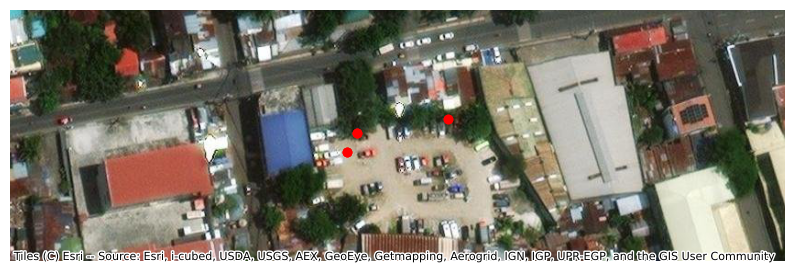

In [47]:
gdf_wm = gdf.to_crs(epsg=3857)
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
ax = gdf_wm.plot(ax=ax, marker='o', color='red')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
margin = 3
x_margin = (xmax - xmin) * margin
y_margin = (ymax - ymin) * margin
ax.set_xlim(xmin - x_margin, xmax + x_margin)
ax.set_ylim(ymin - y_margin, ymax + y_margin)

cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery)
ax.set_axis_off()
plt.savefig('plots/aoi.png', dpi=300)

### TSIP Data Analysis

In [99]:
# load the data from json to pandas dataframe
tsip_raw_data = pd.read_json('data/tsip_data_raw.json')
tsip_raw_data.head()

,responseCode,responseMessage,response
sites,200,OK,"[{'id': 7161, 'latitude': -8.29749, 'longitude..."
industry,200,OK,"[{'value': 2, 'name': 'Artisanal Mining (hand ..."
status,200,OK,"[{'value': 'AP', 'name': 'Approved'}, {'value'..."
kp,200,OK,"[{'value': 13, 'name': 'Mercury - elemental'},..."
investigators,200,OK,"[{'value': 'eushacq@yahoo.com', 'name': 'eusha..."


In [100]:
print(len(tsip_raw_data.iloc[0]['response']))
print(len(tsip_raw_data.iloc[1]['response']))
print(len(tsip_raw_data.iloc[2]['response']))
print(len(tsip_raw_data.iloc[3]['response']))
print(len(tsip_raw_data.iloc[4]['response']))

4958
39
4
70
289


In [101]:
tsip_data = pd.DataFrame(tsip_raw_data.iloc[0]['response'])
tsip_data.head()

,id,latitude,longitude,name,one_sentence,pop_num,isa_date,site_area,site_industry,issue_type,...,health,storage_facility,key_pollutant,bs_scale,isa_completed,country,province_id,site_id,country_name,province_name
0,7161,-8.297490,33.352880,"Izumbi Artisanal and Small Scale Gold Mining, ...",Izumbi Artisanal and Small Scale Gold mining (...,461,2018-10-30,NaN,2.0,I,...,False,False,13.0,4.0,True,tz,p1483,TZ-7161,Tanzania,Mbeya
1,1091,1.700000,31.300000,"Lead pollution at Taita Drill Site, Waki Vill...",NaN,3000,NaN,NaN,17.0,NaN,...,NaN,NaN,12.0,NaN,NaN,ug,p2532,UG-1091,Uganda,Western
2,5001,28.417000,77.310800,"Informal ULAB Recycling, Commercial & Industri...","An informal unit is into repairing, collecting...",710,2016-12-20,20.0,10.0,I,...,False,False,12.0,2.0,True,in,p947,IN-5001,India,Haryana
3,7176,-8.329800,33.221670,"Mawelo Artisanal and Small Scale Gold Mining, ...",Mawelo Artisanal and Small Scale Gold mining (...,647,2018-11-01,NaN,2.0,I,...,False,False,13.0,4.0,True,tz,p1483,TZ-7176,Tanzania,Mbeya
4,652,-0.327528,116.458511,Mahakam River and River Basin- East Kalimatan,NaN,5000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,id,None,ID-652,Indonesia,NaN


In [27]:
# save key pollutants dictionary as json file
key_pollutants = tsip_raw_data.iloc[3]['response']
with open('data/key_pollutants.json', 'w') as f:
    json.dump(key_pollutants, f)

In [102]:
# save toxic sites data as json file
tsip_data_dict = tsip_data.to_dict()
with open('data/tsip_data.json', 'w') as f:
    json.dump(tsip_data_dict, f)

In [3]:
tsip_data = pd.read_json('data/tsip_data.json')
tsip_data.head()

,id,latitude,longitude,name,one_sentence,pop_num,isa_date,site_area,site_industry,issue_type,...,health,storage_facility,key_pollutant,bs_scale,isa_completed,country,province_id,site_id,country_name,province_name
0,7161,-8.297490,33.352880,"Izumbi Artisanal and Small Scale Gold Mining, ...",Izumbi Artisanal and Small Scale Gold mining (...,461.0,2018-10-30,NaN,2.0,I,...,0.0,0.0,13.0,4.0,1.0,tz,p1483,TZ-7161,Tanzania,Mbeya
1,1091,1.700000,31.300000,"Lead pollution at Taita Drill Site, Waki Vill...",None,3000.0,None,NaN,17.0,None,...,NaN,NaN,12.0,NaN,NaN,ug,p2532,UG-1091,Uganda,Western
2,5001,28.417000,77.310800,"Informal ULAB Recycling, Commercial & Industri...","An informal unit is into repairing, collecting...",710.0,2016-12-20,20.0,10.0,I,...,0.0,0.0,12.0,2.0,1.0,in,p947,IN-5001,India,Haryana
3,7176,-8.329800,33.221670,"Mawelo Artisanal and Small Scale Gold Mining, ...",Mawelo Artisanal and Small Scale Gold mining (...,647.0,2018-11-01,NaN,2.0,I,...,0.0,0.0,13.0,4.0,1.0,tz,p1483,TZ-7176,Tanzania,Mbeya
4,652,-0.327528,116.458511,Mahakam River and River Basin- East Kalimatan,None,5000.0,None,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,id,None,ID-652,Indonesia,None


In [4]:
tsip_data_gpd = gpd.GeoDataFrame(tsip_data, geometry=gpd.GeoSeries.from_xy(tsip_data.longitude, tsip_data.latitude), crs="EPSG:4326")
tsip_data_gpd.head()

,id,latitude,longitude,name,one_sentence,pop_num,isa_date,site_area,site_industry,issue_type,...,storage_facility,key_pollutant,bs_scale,isa_completed,country,province_id,site_id,country_name,province_name,geometry
0,7161,-8.297490,33.352880,"Izumbi Artisanal and Small Scale Gold Mining, ...",Izumbi Artisanal and Small Scale Gold mining (...,461.0,2018-10-30,NaN,2.0,I,...,0.0,13.0,4.0,1.0,tz,p1483,TZ-7161,Tanzania,Mbeya,POINT (33.35288 -8.29749)
1,1091,1.700000,31.300000,"Lead pollution at Taita Drill Site, Waki Vill...",None,3000.0,None,NaN,17.0,None,...,NaN,12.0,NaN,NaN,ug,p2532,UG-1091,Uganda,Western,POINT (31.30000 1.70000)
2,5001,28.417000,77.310800,"Informal ULAB Recycling, Commercial & Industri...","An informal unit is into repairing, collecting...",710.0,2016-12-20,20.0,10.0,I,...,0.0,12.0,2.0,1.0,in,p947,IN-5001,India,Haryana,POINT (77.31080 28.41700)
3,7176,-8.329800,33.221670,"Mawelo Artisanal and Small Scale Gold Mining, ...",Mawelo Artisanal and Small Scale Gold mining (...,647.0,2018-11-01,NaN,2.0,I,...,0.0,13.0,4.0,1.0,tz,p1483,TZ-7176,Tanzania,Mbeya,POINT (33.22167 -8.32980)
4,652,-0.327528,116.458511,Mahakam River and River Basin- East Kalimatan,None,5000.0,None,NaN,NaN,None,...,NaN,NaN,NaN,NaN,id,None,ID-652,Indonesia,None,POINT (116.45851 -0.32753)


### Philippines Data Analysis

In [5]:
# data within the Philippines
tsip_data_gpd_ph_unprojected = tsip_data_gpd.cx[118:127, 5:20]
tsip_data_gpd_ph = tsip_data_gpd_ph_unprojected.to_crs(epsg=3857)

In [62]:
def plot_map(geodataframe):
    # Normalize the values to map them to the color scale
    norm = mcolors.Normalize(vmin=0, vmax=10)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(8, 8))
    geodataframe.plot(ax=ax, color='gray')  # Plot base map (optional)
    
    # Scatter plot with circles whose color intensity corresponds to 'value'
    geodataframe.plot(ax=ax, marker='o', color=plt.cm.viridis(norm(geodataframe['bs_scale'])), markersize=50)
    
    # Add a color bar
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])  # Set the array for the color bar
    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)
    plt.colorbar(sm, ax=ax, label='Blacksmith Index')
    fig.text(
        0.33, 0.05,
        "Source: pureearth.org",
        ha='center', va='center',
        fontsize=10, color='gray', fontstyle='italic'
    )
    #plt.axis('off')
    plt.savefig('plots/tsip-ph-bsi.png', dpi=300)
    
    plt.show()

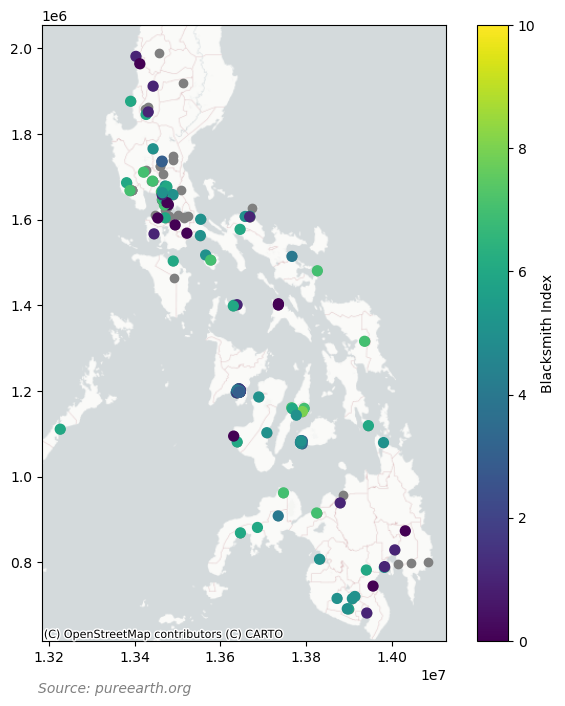

In [63]:
plot_map(tsip_data_gpd_ph)

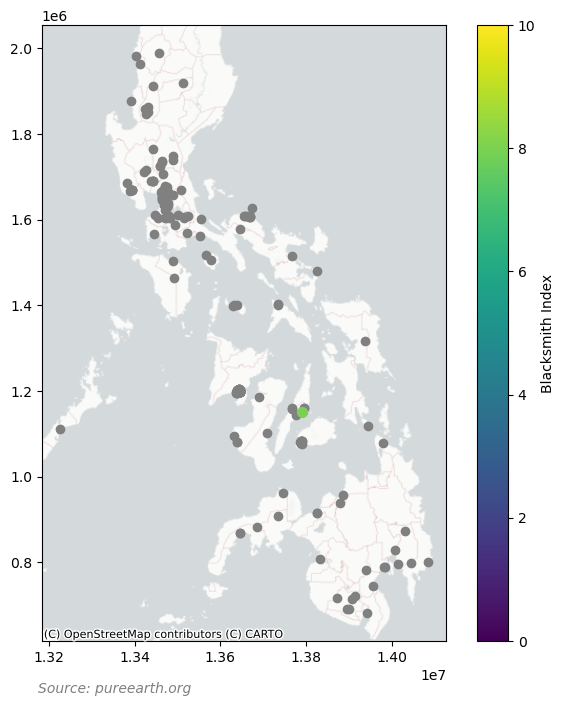

In [67]:
tsip_data_gpd_ph_filtered = tsip_data_gpd_ph[tsip_data_gpd_ph['bs_scale'] > 7]
# Normalize the values to map them to the color scale
norm = mcolors.Normalize(vmin=0, vmax=10)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
tsip_data_gpd_ph.plot(ax=ax, color='gray')  # Plot base map (optional)

# Scatter plot with circles whose color intensity corresponds to 'value'
tsip_data_gpd_ph_filtered.plot(ax=ax, marker='o', color=plt.cm.viridis(norm(tsip_data_gpd_ph_filtered['bs_scale'])), markersize=50)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Set the array for the color bar
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)
plt.colorbar(sm, ax=ax, label='Blacksmith Index')
fig.text(
    0.33, 0.05,
    "Source: pureearth.org",
    ha='center', va='center',
    fontsize=10, color='gray', fontstyle='italic'
)
#plt.axis('off')
plt.savefig('plots/tsip-ph-high-bsi.png', dpi=300)

plt.show()

### World Data Analysis

In [ ]:
tsip_data_gpd_projected = tsip_data_gpd.to_crs(epsg=3857)
tsip_data_gpd_filtered = tsip_data_gpd_projected[tsip_data_gpd_projected['bs_scale'] > 7]
tsip_data_filtered_kp_12 = tsip_data_gpd_projected[tsip_data_gpd_projected['key_pollutant'] == 12]
tsip_data_filtered_kp_12_high_bsi = tsip_data_filtered_kp_12[tsip_data_filtered_kp_12['bs_scale'] > 7]

In [88]:
site_lst_high_bsi = '\n'.join(list(tsip_data_gpd_filtered['id'].astype(str)))
site_lst_high_bsi_kp_12 = '\n'.join(list(tsip_data_filtered_kp_12_high_bsi['id'].astype(str)))

In [89]:
with open('data/sites_of_interest/kp_12_high_bsi.txt', 'w') as f:
    f.write(site_lst_high_bsi_kp_12)

In [43]:
def plt_world(gpd_base, gpd_filtered, title, filename):
    norm = mcolors.Normalize(vmin=0, vmax=10)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(16, 9))
    gpd_base.plot(ax=ax, color='gray', markersize=1)  # Plot base map (optional)
    
    # Scatter plot with circles whose color intensity corresponds to 'value'
    gpd_filtered.plot(ax=ax, marker='o', color=plt.cm.viridis(norm(gpd_filtered['bs_scale'])), markersize=50)
    
    # Add a color bar
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])  # Set the array for the color bar
    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)
    plt.colorbar(sm, ax=ax, label='Blacksmith Index')
    plt.title(title, fontsize=14)
    # Add footer text
    fig.text(
        0.1725, 0.1, 
        "Source: pureearth.org",
        ha='center', va='center',
        fontsize=10, color='gray', fontstyle='italic'
    )
    #plt.axis('off')
    plt.savefig(f'plots/{filename}.png', dpi=300)
    plt.show()

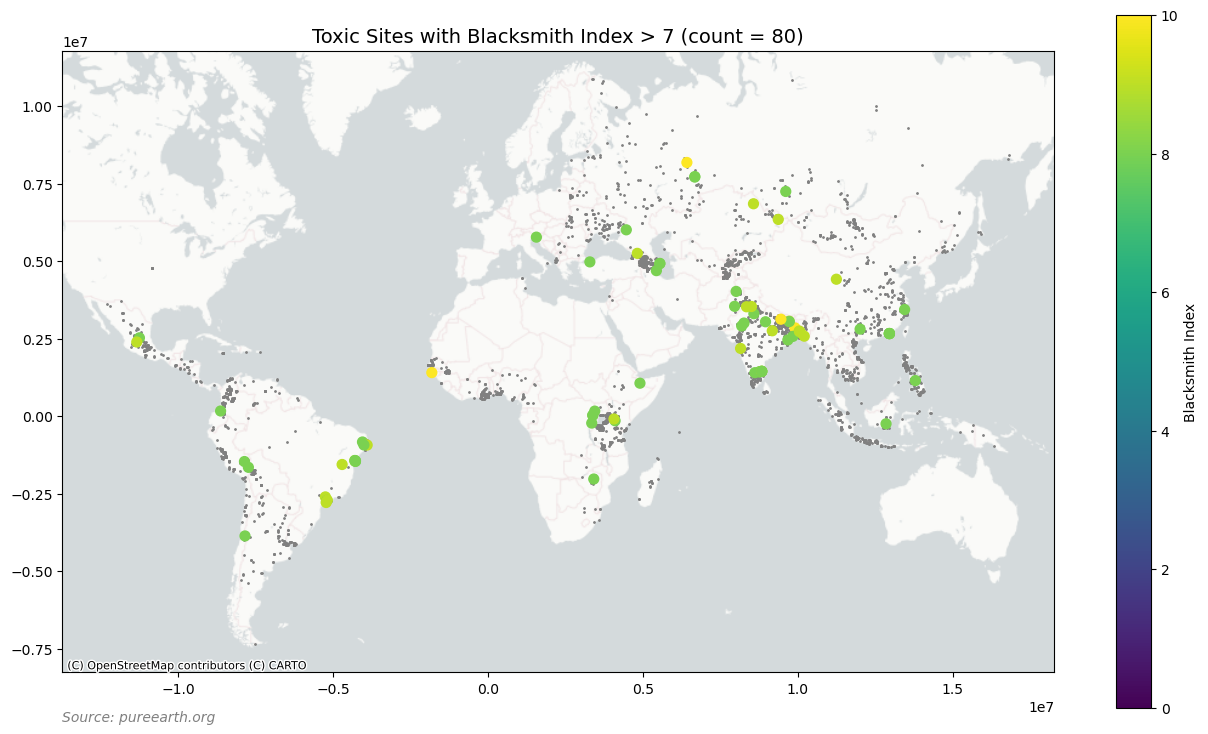

In [44]:
plt_world(
    tsip_data_gpd_projected, 
    tsip_data_gpd_filtered, 
    f'Toxic Sites with Blacksmith Index > 7 (count = {len(tsip_data_gpd_filtered)})',
    'tsip-world-high-bsi'
)

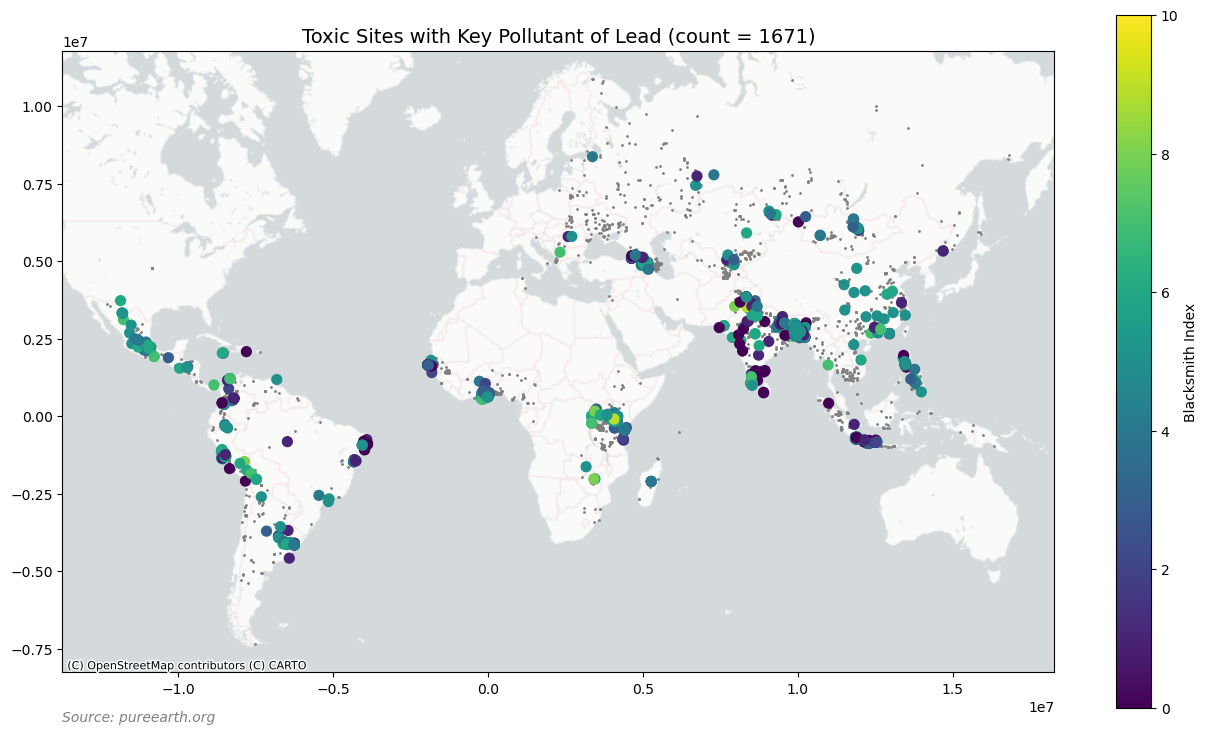

In [45]:
plt_world(
    tsip_data_gpd_projected, 
    tsip_data_filtered_kp_12, 
    f'Toxic Sites with Key Pollutant of Lead (count = {len(tsip_data_filtered_kp_12)})',
    'tsip-world-kp-12'
)

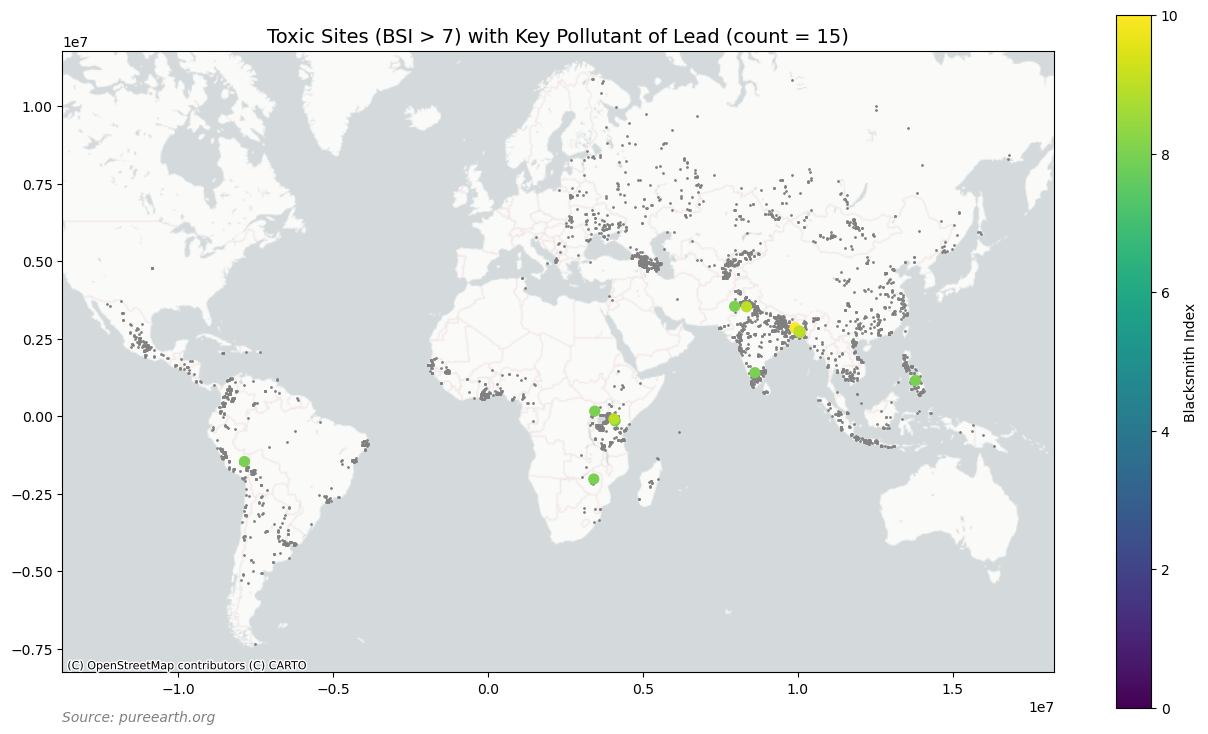

In [46]:
plt_world(
    tsip_data_gpd_projected,
    tsip_data_filtered_kp_12_high_bsi,
    f'Toxic Sites (BSI > 7) with Key Pollutant of Lead (count = {len(tsip_data_filtered_kp_12_high_bsi)})',
    'tsip-world-kp-12-high-bsi'
)

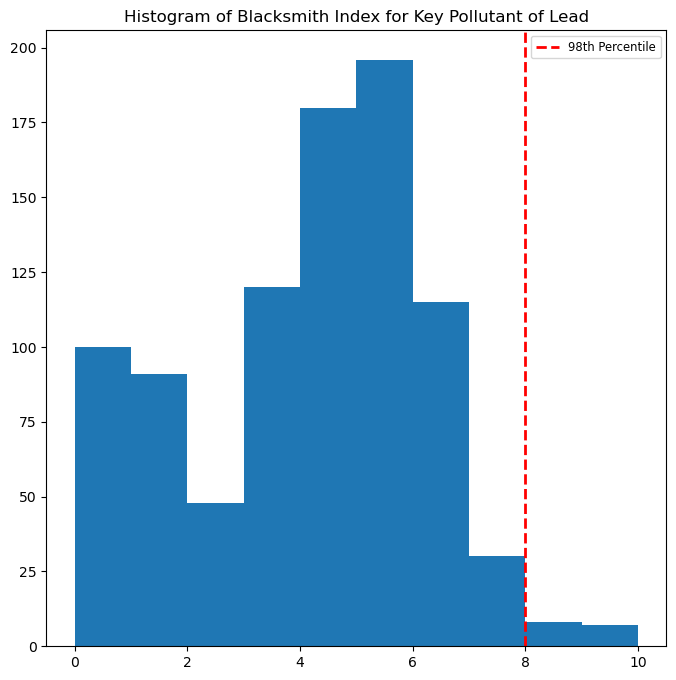

1671

In [72]:
# plot histogram of key_pollutant == 12
_, ax = plt.subplots(figsize=(8, 8))
ax.hist(tsip_data_filtered_kp_12['bs_scale'], bins=10)
# Add a vertical line for the single site's severity
plt.axvline(8, color='red', linestyle='dashed', linewidth=2, label=f'98th Percentile')
plt.title('Histogram of Blacksmith Index for Key Pollutant of Lead')
plt.legend(loc='upper right', fontsize='small')
plt.savefig('plots/histogram-lead-bsi.png', dpi=300)
plt.show()
len(tsip_data_filtered_kp_12)

In [16]:
n_lead_pollutants_bigger_than_bsi_of_7 = len(tsip_data_filtered_kp_12[tsip_data_filtered_kp_12['bs_scale'] > 7])
print('Number of Toxic Sites (BSI > 7) with Key Pollutant of Lead:', n_lead_pollutants_bigger_than_bsi_of_7)

Number of Toxic Sites (BSI > 7) with Key Pollutant of Lead: 15


In [11]:
# cdf of blacksmith index for key_pollutant == 12 > 7
data = tsip_data_filtered_kp_12['bs_scale']

mean = np.mean(data)
std_dev = np.std(data)

print(f"Mean: {mean}, Standard Deviation: {std_dev}")

# Calculate cumulative probabilities for each value in the dataset
cumulative_probs = norm.cdf(8, loc=mean, scale=std_dev)
print("Cumulative probabilities:", 1 - cumulative_probs)

Mean: 3.6614525139664806, Standard Deviation: 2.084907219438531
Cumulative probabilities: 0.9812798761950828


# Conclusion